In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
data = pd.read_csv("/content/titanic.csv")

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [ ]:
data= data.drop(columns = ['Pclass'])

In [ ]:
data= data.drop(columns = ['Name'])

In [ ]:
data.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

missing value handleing

In [ ]:
data['Age'].fillna(data['Age'].median(),inplace=True)
data['Embarked'].fillna(data['Embarked'].mode(), inplace=True)

outlair remove from fare coloumn

In [ ]:
z_scores = np.abs(stats.zscore(data['Fare']))
data =data[(z_scores < 3)]

label encodeing

In [ ]:
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

In [ ]:
data.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,0,35.0,1,0,113803,53.1000,C123,2
4,5,0,1,35.0,0,0,373450,8.0500,NaN,2


SPLIT DATA INTO FEATURES AND TARGET

In [ ]:
X = data.drop('Survived',axis = 1)
Y = data['Survived']

In [ ]:
data.head

<bound method NDFrame.head of      PassengerId  Survived  Sex   Age  SibSp  Parch            Ticket  \
0              1         0    1  22.0      1      0         A/5 21171   
1              2         1    0  38.0      1      0          PC 17599   
2              3         1    0  26.0      0      0  STON/O2. 3101282   
3              4         1    0  35.0      1      0            113803   
4              5         0    1  35.0      0      0            373450   
..           ...       ...  ...   ...    ...    ...               ...   
886          887         0    1  27.0      0      0            211536   
887          888         1    0  19.0      0      0            112053   
888          889         0    0  28.0      1      2        W./C. 6607   
889          890         1    1  26.0      0      0            111369   
890          891         0    1  32.0      0      0            370376   

        Fare Cabin  Embarked  
0     7.2500   NaN         2  
1    71.2833   C85         0  


In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# Handle missing values in 'Age' column by filling with the median age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Handle missing values in 'Embarked' column by filling with the most common value
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column due to a large number of missing values
data.drop('Cabin', axis=1, inplace=True)


In [ ]:
data.isnull().sum()

PassengerId    0
Survived       0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

split train test

In [ ]:
# X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

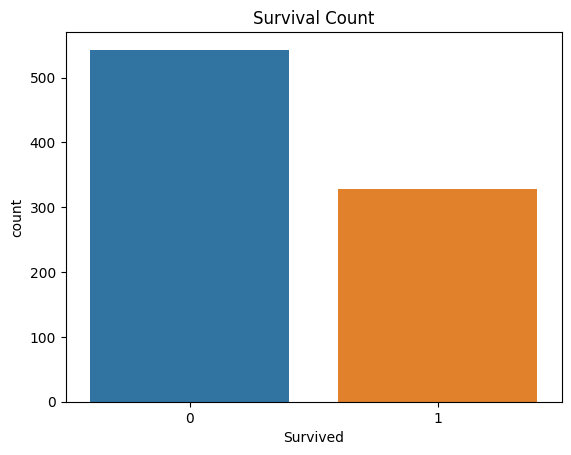

In [ ]:
sns.countplot(x='Survived', data=data)
plt.title('Survival Count')
plt.show()


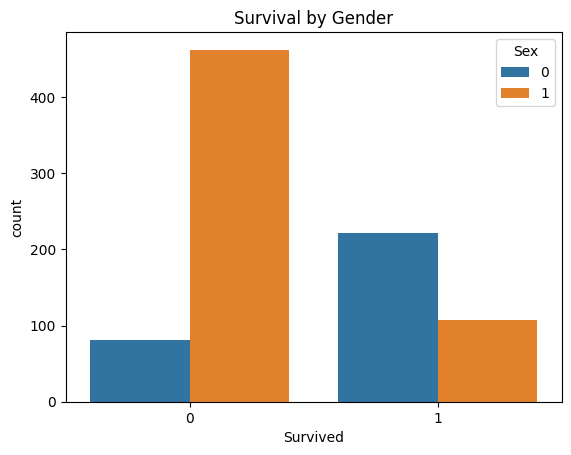

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Survival by Gender')
plt.show()


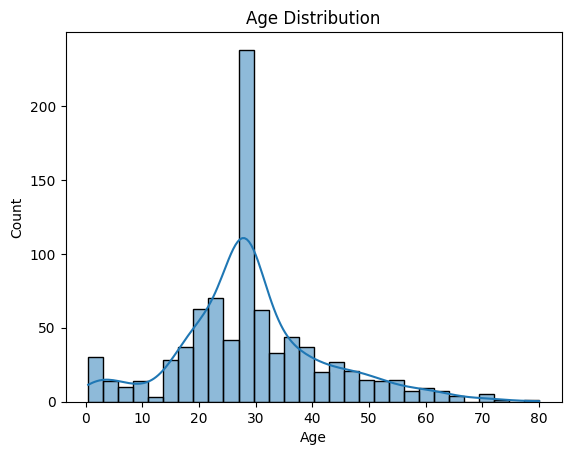

In [ ]:
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()


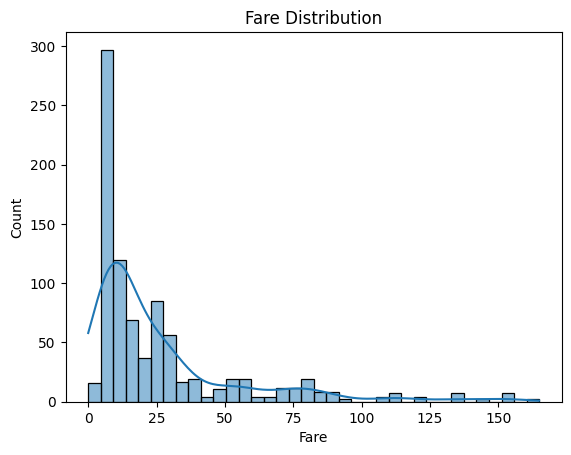

In [ ]:
sns.histplot(data['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()


<ipython-input-58-8fdd069a6fbf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


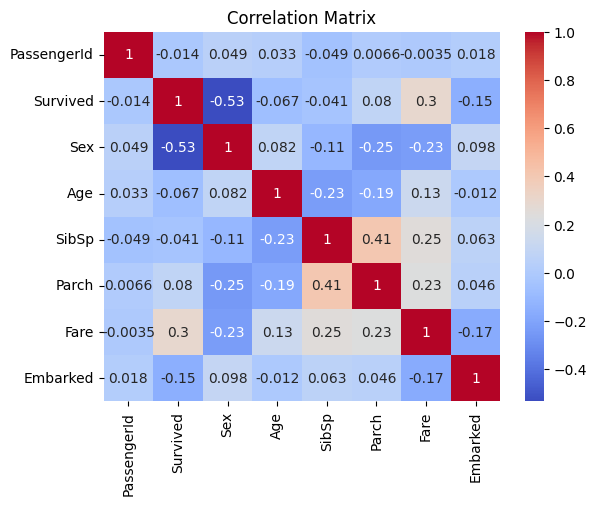

In [ ]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
